In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [2]:
dataset = pd.read_csv('new_appdata1029.csv')

In [3]:
#data pre-processing

In [4]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [5]:
response = dataset["enrolled"]
dataset = dataset.drop(columns = 'enrolled')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset, response, 
                                                   test_size = 0.2,
                                                   random_state = 0)

In [7]:
print("Training Data:")
print(X_train.head())

Training Data:
         user  dayofweek  hour  age  numscreens  minigame  \
20330  315793          2    20   32           5         0   
17532  103347          1    21   22          42         1   
45819  373340          0     4   26          85         1   
34807  324006          4    13   25          24         1   
31888  248759          3    16   50          11         0   

       used_premium_feature  liked  location  Institutions  ...  \
20330                     1      1         0             0  ...   
17532                     0      0         1             1  ...   
45819                     0      0         0             1  ...   
34807                     0      0         1             0  ...   
31888                     0      0         1             0  ...   

       SecurityModal  ResendToken  TransactionList  NetworkFailure  \
20330              0            0                0               0   
17532              0            0                0               0   
45819

In [8]:
print("\nTest Data:")
print(X_test.head())


Test Data:
         user  dayofweek  hour  age  numscreens  minigame  \
11841  239786          0     1   41          34         0   
19602  279644          5     6   26          30         0   
45519   98290          0    15   37          11         0   
25747  170150          5    19   21          13         0   
42642  237568          5     1   30          32         0   

       used_premium_feature  liked  location  Institutions  ...  \
11841                     0      1         1             0  ...   
19602                     0      0         1             0  ...   
45519                     1      0         0             0  ...   
25747                     0      1         0             0  ...   
42642                     0      0         0             0  ...   

       SecurityModal  ResendToken  TransactionList  NetworkFailure  \
11841              0            0                0               0   
19602              0            0                0               0   
45519   

In [10]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')
#at the end we need to relate the user and user identification to the response 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [13]:
#standardscalar returns a numpy array with Multiple dimensions
#fittransform fits it to the std scalar and then transforms it to proper scalar

In [14]:
#model building

In [ ]:
#L1-penalty = By adding an L1 penalty term to the loss function, many coefficients of features are driven to zero.
#As a result, it effectively eliminates irrelevant or less important features, making the model simpler and more
#interpretable. This is particularly useful when dealing with high-dimensional datasets with many potentially
#redundant or irrelevant features.

#for example, we are likely to run into loan screen when we open a screen realted to finance or something 
# so l1 penalty is used to normalise or regularise this 

In [21]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model with L1 regularization and 'liblinear' solver
classifier = LogisticRegression(penalty='l1', solver='liblinear',random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [23]:
y_pred = classifier.predict(X_test)
print(y_pred)#predict_proba 

[1 1 0 ... 0 1 1]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(Y_test, y_pred)
#A confusion matrix is a table that summarizes the performance of a classification algorithm.

In [27]:
accuracy_score(Y_test, y_pred)
#Accuracy is a straightforward metric that measures the overall correctness of a model.

0.7499

In [28]:
precision_score(Y_test, y_pred) # tp / (tp + fp) tp=true positive and fp=false positive
#Precision measures the accuracy of positive predictions made by a model.
#High precision indicates that when the model predicts a positive class, it's likely to be correct.

0.7850137909898867

In [29]:
recall_score(Y_test, y_pred) # tp / (tp + fn) fn=false negatives 
#Recall measures the ability of the model to identify all relevant instances.
#High recall indicates that the model captures a large proportion of positive instances.

0.8235010448480952

In [30]:
f1_score(Y_test, y_pred)
#The F1 score is the harmonic mean of precision and recall.

0.8037969718365104

Test Data Accuracy: 0.7499


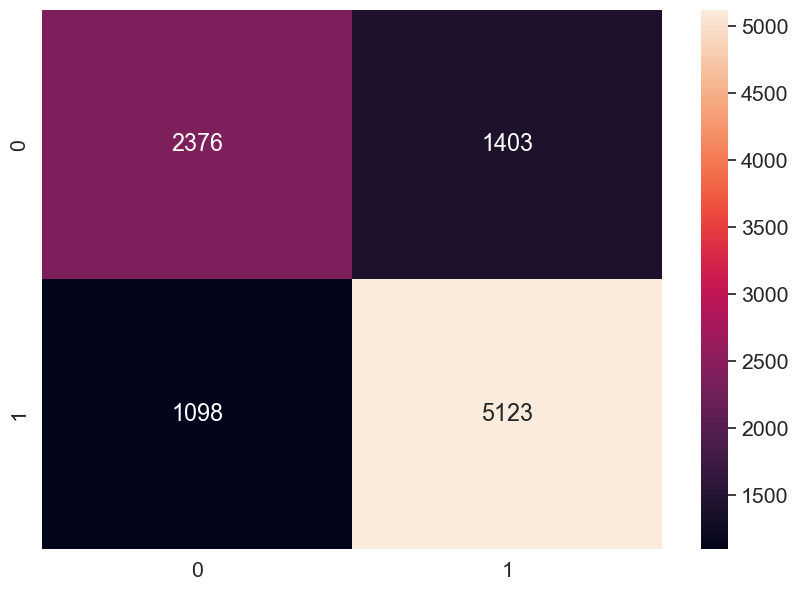

In [32]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(Y_test, y_pred))


In [33]:
#all dark colour ie 1098 and 1403 gives us fp fn
#purple=how many who have not enrolled=0
#light pink = how many who have enrolled=1

In [34]:
#True Positives (TP): The number of correct positive predictions.
#True Negatives (TN): The number of correct negative predictions.
#False Positives (FP): The number of incorrect positive predictions (Type I error).
#False Negatives (FN): The number of incorrect negative predictions (Type II error).

In [35]:
#k-fold = is to make sure that i havent overfitted

In [36]:
#The main idea behind k-Fold Cross-Validation is to divide the dataset into multiple subsets, or "folds,"
#and perform model training and evaluation multiple times. 

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Logistic  Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
# std deviation=0.01

Logistic  Accuracy: 0.757 (+/- 0.010)


In [40]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.033674
1,hour,-0.041990
2,age,-0.088098
3,numscreens,-0.090119
4,minigame,0.283037
5,used_premium_feature,-0.084578
6,liked,-0.000674
7,location,-0.171737
8,Institutions,0.023256
9,VerifyPhone,0.579039


In [41]:
#### Model Tuning ####
#Grid search, also known as hyperparameter grid search, is a technique used in machine learning to find the 
#optimal hyperparameters for a model. Hyperparameters are parameters that are not learned from the data but are
#set before training, and they significantly influence a model's performance. 

In [42]:
## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

In [43]:
# Select Regularization Method
penalty = ['l1', 'l2']

In [44]:
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [46]:
# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, Y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 25.30 seconds


In [47]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7570749999999999, {'C': 0.1, 'penalty': 'l1'})

In [48]:
## Grid Search (Round 2)

In [49]:
# Select Regularization Method
penalty = ['l1', 'l2']

In [50]:
# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

In [51]:
# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, Y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 20.52 seconds


In [52]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

0.7570749999999999

In [53]:

#### End of Model ####


In [56]:
# Formatting Final Results
final_results = pd.concat([Y_test, test_identifier], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [57]:
print(final_results)

        user  enrolled  predicted_reach
0     239786         1                1
1     279644         1                1
2      98290         0                0
3     170150         1                1
4     237568         1                1
...      ...       ...              ...
9995  143036         1                0
9996   91158         1                1
9997  248318         0                0
9998  142418         1                1
9999  279355         1                1

[10000 rows x 3 columns]
